# Data Analysis
### Sub-Analytical Question:
#### **To what extent are these datasets comparable and consistent, and what differences, if any, exist in what they measure?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Load datasets
importsdf = pd.read_excel(
    "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/refs/heads/main/1_datasets/cleaned_data/UN_comtrade_clean_dataset.xlsx"
)
ongriddf = pd.read_excel(
    "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/refs/heads/main/1_datasets/cleaned_data/IRENA_ONGRIDStats.cleaned.xlsx"
)
offgriddf = pd.read_excel(
    "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/refs/heads/main/1_datasets/cleaned_data/IRENA_OFGStats.cleaned.xlsx"
)

In [4]:
# 2. Standardize & select
imports_df = importsdf.rename(columns={"Value_USD": "Imports_USD"})
ongrid_df = ongriddf.rename(
    columns={"Electricity Installed Capacity (MW)": "OnGrid_MW"}
)
offgrid_df = offgriddf.rename(columns={"Value": "OffGrid_MW"})

In [5]:
# === Filter ON-GRID for only solar-related entries ===
# solar_ongrid = ongrid_df[
# (ongrid_df["Technology"].str.contains("Solar photovoltaic", case=False, na=False)) &
# (ongrid_df["Producer Type"].str.contains("On-grid electricity", case=False, na=False))
# ]
# solar_ongrid.head(30)

In [6]:
# Group and aggregate total installed solar capacity by Country & Year
# solar_ongrid_agg = solar_ongrid.groupby(
#   ["Country", "Year"], as_index=False
# )["OnGrid_MW"].sum()
# solar_ongrid_agg.head()

In [7]:
# === Filter OFF-GRID for only solar-related deployment (exclude people counts etc.) ===
# Keep only rows that represent power capacity (not people, households, etc.)
valid_units = ["kW", "MW"]
offgrid_df = offgrid_df[offgrid_df["Unit"].isin(valid_units)]

In [8]:
# Keep solar records that are either "Solar PV (Others)" or "Solar mini-grids"
solar_offgrid = offgrid_df[
    offgrid_df["Sub-Technology"].str.contains(
        "Solar PV \(Others\)|Solar mini-grids", case=False, na=False
    )
]

solar_offgrid.head()

<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
C:\Users\moham\AppData\Local\Temp\ipykernel_19264\2650819059.py:4: SyntaxWarning: invalid escape sequence '\('
  "Solar PV \(Others\)|Solar mini-grids", case=False, na=False


,Region,Country,ISO Code,Flow,Group Technology,Sub-Technology,Technology,OffGrid_MW,Unit,Year,Conflict Status
0,Africa,Angola,AGO,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2010,No Conflict
1,Africa,Angola,AGO,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2011,No Conflict
2,Africa,Angola,AGO,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2012,No Conflict
3,Africa,Benin,BEN,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2010,No Conflict
4,Africa,Benin,BEN,Off-grid capacity,Solar energy,Solar PV (Others),Other off-grid solar PV,0.0,MW,2011,No Conflict


In [9]:
# Group Off grid by Country and Year
solar_offgrid_agg = solar_offgrid.groupby(["Country", "Year"], as_index=False)[
    "OffGrid_MW"
].sum()
solar_offgrid_agg.head()

,Country,Year,OffGrid_MW
0,Afghanistan,2010,0.100
1,Afghanistan,2011,0.100
2,Afghanistan,2012,16.100
3,Afghanistan,2013,16.344
4,Afghanistan,2014,17.394


In [10]:
# Group imports data by Country and Year
imports_df_agg = imports_df.groupby(["Country", "Year"], as_index=False)[
    "Imports_USD"
].sum()

# **First: Imports VS Solar Off Grid**

## Correlation analysis between Imports data and Off grid data (solar only) for Yemen (2010-2015)

In [11]:
# Group imports data for Yemen between 2010 and 2015
yemen_imports = imports_df_agg[
    (imports_df_agg["Country"] == "Yemen")
    & (imports_df_agg["Year"].between(2010, 2015))
]
yemen_imports.head(6)

,Country,Year,Imports_USD
329,Yemen,2010,7779766.0
330,Yemen,2011,9926717.0
331,Yemen,2012,10505127.0
332,Yemen,2013,6403622.0
333,Yemen,2014,12308661.0
334,Yemen,2015,33475232.0


In [12]:
# Group  solar Off grid data for Yemen between 2010 and 2015
yemen_offgrid = solar_offgrid_agg[
    (solar_offgrid_agg["Country"] == "Yemen")
    & (solar_offgrid_agg["Year"].between(2010, 2015))
]
yemen_offgrid.head(6)

,Country,Year,OffGrid_MW
1750,Yemen,2010,1.0070
1751,Yemen,2011,1.2860
1752,Yemen,2012,1.3670
1753,Yemen,2013,2.3690
1754,Yemen,2014,5.4025
1755,Yemen,2015,60.0003


In [13]:
# Merge on 'Year' and Country
yemen_merged = pd.merge(
    yemen_imports[["Year", "Imports_USD"]],
    yemen_offgrid[["Year", "OffGrid_MW"]],
    on="Year",
    how="inner",
)
yemen_merged.head(10)

,Year,Imports_USD,OffGrid_MW
0,2010,7779766.0,1.0070
1,2011,9926717.0,1.2860
2,2012,10505127.0,1.3670
3,2013,6403622.0,2.3690
4,2014,12308661.0,5.4025
5,2015,33475232.0,60.0003


In [14]:
# Compute correlation
yemen_correlation = yemen_merged["Imports_USD"].corr(yemen_merged["OffGrid_MW"])

In [15]:
print(
    "Correlation between import value and off-grid capacity for Yemen:",
    yemen_correlation,
)

Correlation between import value and off-grid capacity for Yemen: 0.9839829903810307


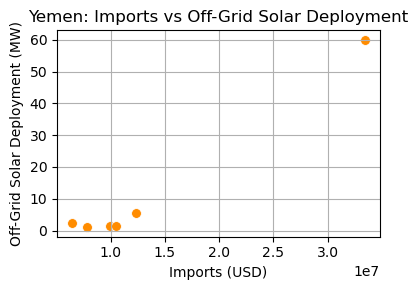

In [16]:
# Scatter plot
plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=yemen_merged, x="Imports_USD", y="OffGrid_MW", color="darkorange", s=50
)
plt.title("Yemen: Imports vs Off-Grid Solar Deployment")
plt.xlabel("Imports (USD)")
plt.ylabel("Off-Grid Solar Deployment (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation analysis between Imports data and Off grid data (solar only) for Ethiopia (2011-2023)

In [17]:
# Group imports data for Ethiopia between 2011 and 2023
ethiopia_imports = imports_df_agg[
    (imports_df_agg["Country"] == "Ethiopia")
    & (imports_df_agg["Year"].between(2011, 2023))
]
ethiopia_imports.head(15)

,Country,Year,Imports_USD
35,Ethiopia,2011,2.097474e+07
36,Ethiopia,2012,2.787158e+07
37,Ethiopia,2013,2.594942e+07
38,Ethiopia,2014,4.737693e+07
39,Ethiopia,2015,4.564162e+07
40,Ethiopia,2016,5.148506e+07
41,Ethiopia,2017,4.190237e+07
42,Ethiopia,2018,6.891282e+07
43,Ethiopia,2019,7.506078e+07
44,Ethiopia,2020,6.940082e+07


In [18]:
# Group  solar Off grid data for Ethiopia between 2011 and 2023
ethiopia_offgrid = solar_offgrid_agg[
    (solar_offgrid_agg["Country"] == "Ethiopia")
    & (solar_offgrid_agg["Year"].between(2011, 2023))
]
ethiopia_offgrid.head(15)

,Country,Year,OffGrid_MW
603,Ethiopia,2011,0.03260
604,Ethiopia,2012,0.09417
605,Ethiopia,2013,0.09417
606,Ethiopia,2014,3.43755
607,Ethiopia,2015,3.45255
608,Ethiopia,2016,10.58755
609,Ethiopia,2017,10.59109
610,Ethiopia,2018,14.17499
611,Ethiopia,2019,14.74049
612,Ethiopia,2020,15.63099


In [19]:
# Merge on 'Year' and Country
ethiopia_merged = pd.merge(
    ethiopia_imports[["Year", "Imports_USD"]],
    ethiopia_offgrid[["Year", "OffGrid_MW"]],
    on="Year",
    how="inner",
)
ethiopia_merged.head(13)

,Year,Imports_USD,OffGrid_MW
0,2011,2.097474e+07,0.03260
1,2012,2.787158e+07,0.09417
2,2013,2.594942e+07,0.09417
3,2014,4.737693e+07,3.43755
4,2015,4.564162e+07,3.45255
5,2016,5.148506e+07,10.58755
6,2017,4.190237e+07,10.59109
7,2018,6.891282e+07,14.17499
8,2019,7.506078e+07,14.74049
9,2020,6.940082e+07,15.63099


In [20]:
# Compute correlation
ethiopia_correlation = ethiopia_merged["Imports_USD"].corr(
    ethiopia_merged["OffGrid_MW"]
)
print(
    "Correlation between import value and off-grid capacity for Ethiopia:",
    ethiopia_correlation,
)

Correlation between import value and off-grid capacity for Ethiopia: 0.8294117928315476


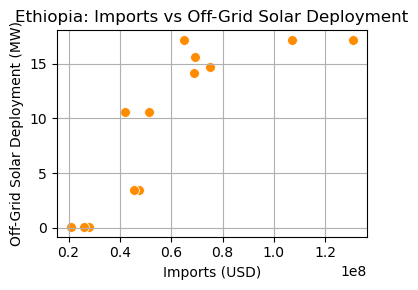

In [21]:
# Scatter plot
plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=ethiopia_merged, x="Imports_USD", y="OffGrid_MW", color="darkorange", s=50
)
plt.title("Ethiopia: Imports vs Off-Grid Solar Deployment")
plt.xlabel("Imports (USD)")
plt.ylabel("Off-Grid Solar Deployment (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation analysis between Imports data and solar Off grid data between 2016 and 2018

In [22]:
# Filter Imports data for a list of years
years_filter = [2016, 2017, 2018]
filtered_imports = imports_df_agg[imports_df_agg["Year"].isin(years_filter)]
filtered_imports.head(10)

,Country,Year,Imports_USD
16,Central African Rep.,2016,1.047814e+06
17,Central African Rep.,2017,7.392743e+05
18,Central African Rep.,2018,5.960503e+06
40,Ethiopia,2016,5.148506e+07
41,Ethiopia,2017,4.190237e+07
42,Ethiopia,2018,6.891282e+07
64,Germany,2016,7.590390e+09
65,Germany,2017,8.856396e+09
66,Germany,2018,1.006528e+10
78,Libya,2016,1.468795e+07


In [23]:
unique_countries = filtered_imports["Country"].nunique()
unique_countries_list = list(filtered_imports["Country"].unique())
print(unique_countries_list)

['Central African Rep.', 'Ethiopia', 'Germany', 'Libya', 'Mali', 'Morocco', 'Mozambique', 'Myanmar', 'Nigeria', 'Pakistan', 'Rwanda', 'Saudi Arabia', 'State of Palestine', 'Sudan', 'Ukraine', 'Yemen']


In [24]:
# Filter Off grid data for a list of years and the countries present in imports data
years_filter = [2016, 2017, 2018]
filtered_offgrid = solar_offgrid_agg[
    (solar_offgrid_agg["Year"].isin(years_filter))
    & (solar_offgrid_agg["Country"].isin(unique_countries_list))
]
filtered_offgrid.shape

(33, 3)

In [25]:
# Get the countries common between both data sets for these years
unique_countries2 = filtered_offgrid["Country"].nunique()
unique_countries_list2 = list(filtered_offgrid["Country"].unique())
print(unique_countries_list2)
print(unique_countries2)

['Ethiopia', 'Libya', 'Mali', 'Morocco', 'Mozambique', 'Myanmar', 'Nigeria', 'Pakistan', 'Rwanda', 'Saudi Arabia', 'Yemen']
11


In [26]:
# Filter imports data for countries present across both imports data and solar offgrid data
filtered_imports1 = imports_df_agg[
    (imports_df_agg["Year"].isin(years_filter))
    & (imports_df_agg["Country"].isin(unique_countries_list2))
]
filtered_imports1.shape

(31, 3)

In [27]:
# Create a new list excluding 'Yemen' to make both the same shape and Saudi Arabia because it is an outlier
filtered_countries = [
    c for c in unique_countries_list2 if c not in ["Yemen", "Saudi Arabia"]
]

# Apply the filter
filtered_imports2 = imports_df_agg[
    (imports_df_agg["Year"].isin(years_filter))
    & (imports_df_agg["Country"].isin(filtered_countries))
]
filtered_offgrid2 = solar_offgrid_agg[
    (solar_offgrid_agg["Year"].isin(years_filter))
    & (solar_offgrid_agg["Country"].isin(filtered_countries))
]
filtered_imports2.head()

,Country,Year,Imports_USD
40,Ethiopia,2016,5.148506e+07
41,Ethiopia,2017,4.190237e+07
42,Ethiopia,2018,6.891282e+07
78,Libya,2016,1.468795e+07
79,Libya,2017,1.738022e+07


In [48]:
# Sort both dataframes
filtered_imports2 = filtered_imports2.sort_values(by=["Country", "Year"])
filtered_offgrid2 = filtered_offgrid2.sort_values(by=["Country", "Year"])

# Merge on both 'Country' and 'Year'
time_filtered_merged = pd.merge(
    filtered_imports2[["Country", "Year", "Imports_USD"]],
    filtered_offgrid2[["Country", "Year", "OffGrid_MW"]],
    on=["Country", "Year"],
    how="inner",  # Use 'inner' to keep only rows that exist in both dataframes
)

time_filtered_merged.head()

,Country,Year,Imports_USD,OffGrid_MW
0,Ethiopia,2016,5.148506e+07,10.58755
1,Ethiopia,2017,4.190237e+07,10.59109
2,Ethiopia,2018,6.891282e+07,14.17499
3,Libya,2016,1.468795e+07,4.76820
4,Libya,2017,1.738022e+07,4.97820


In [29]:
# Compute correlation
time_filtered_correlation = time_filtered_merged["Imports_USD"].corr(
    time_filtered_merged["OffGrid_MW"]
)
print(
    "Correlation between import value and off-grid capacity in the period (2016-2018)",
    time_filtered_correlation,
)

Correlation between import value and off-grid capacity in the period (2016-2018) 0.34794288463822876


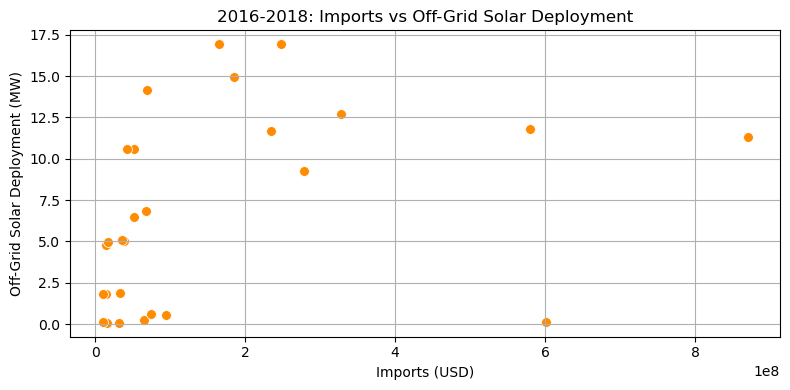

In [30]:
# Scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=time_filtered_merged, x="Imports_USD", y="OffGrid_MW", color="darkorange", s=50
)
plt.title("2016-2018: Imports vs Off-Grid Solar Deployment")
plt.xlabel("Imports (USD)")
plt.ylabel("Off-Grid Solar Deployment (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Second: Imports VS  On Grid**

In [31]:
# Filter ON-GRID for only solar-related entries
solar_ongrid = ongrid_df[
    (ongrid_df["Technology"].str.contains("Solar photovoltaic", case=False, na=False))
    & (
        ongrid_df["Producer Type"].str.contains(
            "On-grid electricity", case=False, na=False
        )
    )
]
solar_ongrid.head()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,OnGrid_MW,Classification
111,Africa,Northern Africa,Algeria,DZA,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2014,2.2,Comparison Countries
112,Africa,Northern Africa,Algeria,DZA,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2015,17.2,Comparison Countries
113,Africa,Northern Africa,Algeria,DZA,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2016,217.2,Comparison Countries
114,Africa,Northern Africa,Algeria,DZA,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2017,310.2,Comparison Countries
115,Africa,Northern Africa,Algeria,DZA,Total Renewable,Solar energy,Solar photovoltaic,On-grid Solar photovoltaic,On-grid electricity,2018,322.2,Comparison Countries


In [32]:
# Group and aggregate total installed solar capacity by Country & Year
solar_ongrid_agg = solar_ongrid.groupby(["Country", "Year"], as_index=False)[
    "OnGrid_MW"
].sum()
solar_ongrid_agg.head()

,Country,Year,OnGrid_MW
0,Afghanistan,2017,1.7
1,Afghanistan,2018,1.7
2,Afghanistan,2019,31.7
3,Afghanistan,2020,31.7
4,Afghanistan,2021,31.7


In [33]:
# The total amount of On-Grid electricity capacity (including non renewable)
total_ongrid = ongrid_df[
    ongrid_df["Producer Type"].str.contains("On-grid electricity", case=False, na=False)
]

In [34]:
# The total amount of On-Grid electricity capacity (excluding solar energy)
non_solar_ongrid = ongrid_df[
    (
        ongrid_df["Producer Type"].str.contains(
            "On-grid electricity", case=False, na=False
        )
    )
    & (ongrid_df["Group Technology"].str.lower() != "solar energy")
]
non_solar_ongrid.head()

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,OnGrid_MW,Classification
0,Africa,Northern Africa,Algeria,DZA,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,5459.01,Comparison Countries
1,Africa,Northern Africa,Algeria,DZA,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,5455.50,Comparison Countries
2,Africa,Northern Africa,Algeria,DZA,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2002,5891.01,Comparison Countries
3,Africa,Northern Africa,Algeria,DZA,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2003,6013.24,Comparison Countries
4,Africa,Northern Africa,Algeria,DZA,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2004,6305.24,Comparison Countries


In [35]:
# Group and aggregate total installed On grid capacity and non solar on grid capacity by Country & Year
total_ongrid_agg = total_ongrid.groupby(["Country", "Year"], as_index=False)[
    "OnGrid_MW"
].sum()
non_solar_ongrid_agg = non_solar_ongrid.groupby(["Country", "Year"], as_index=False)[
    "OnGrid_MW"
].sum()
non_solar_ongrid_agg.head()

,Country,Year,OnGrid_MW
0,Afghanistan,2000,194.298
1,Afghanistan,2001,194.298
2,Afghanistan,2002,194.298
3,Afghanistan,2003,201.606
4,Afghanistan,2004,216.586


## Correlation analysis between Imports data and On Grid data (solar only) for Ukraine

In [36]:
# Group imports data for Ukraine between 2010 and 2024
ukraine_imports = imports_df_agg[
    (imports_df_agg["Country"] == "Ukraine")
    & (imports_df_agg["Year"].between(2010, 2024))
]
ukraine_imports.head()

,Country,Year,Imports_USD
308,Ukraine,2010,9.837867e+07
309,Ukraine,2011,1.209295e+08
310,Ukraine,2012,1.020807e+09
311,Ukraine,2013,7.467528e+08
312,Ukraine,2014,1.106136e+08


In [37]:
# Group  solar On grid data for Ukraine between 2010 and 2024
ukraine_ongrid = solar_ongrid_agg[
    (solar_ongrid_agg["Country"] == "Ukraine")
    & (solar_ongrid_agg["Year"].between(2010, 2024))
]
ukraine_ongrid.head()

,Country,Year,OnGrid_MW
2899,Ukraine,2010,2.5
2900,Ukraine,2011,188.2
2901,Ukraine,2012,371.6
2902,Ukraine,2013,748.4
2903,Ukraine,2014,819.1


In [38]:
# Merge on 'Year' and Country
ukraine_merged = pd.merge(
    ukraine_imports[["Year", "Imports_USD"]],
    ukraine_ongrid[["Year", "OnGrid_MW"]],
    on="Year",
    how="inner",
)
ukraine_merged.head()

,Year,Imports_USD,OnGrid_MW
0,2010,9.837867e+07,2.5
1,2011,1.209295e+08,188.2
2,2012,1.020807e+09,371.6
3,2013,7.467528e+08,748.4
4,2014,1.106136e+08,819.1


In [39]:
# Compute correlation
ukraine_correlation = ukraine_merged["Imports_USD"].corr(ukraine_merged["OnGrid_MW"])
print(
    "Correlation between import value and on-grid capacity for Ukraine:",
    ukraine_correlation,
)

Correlation between import value and on-grid capacity for Ukraine: 0.3438388607077003


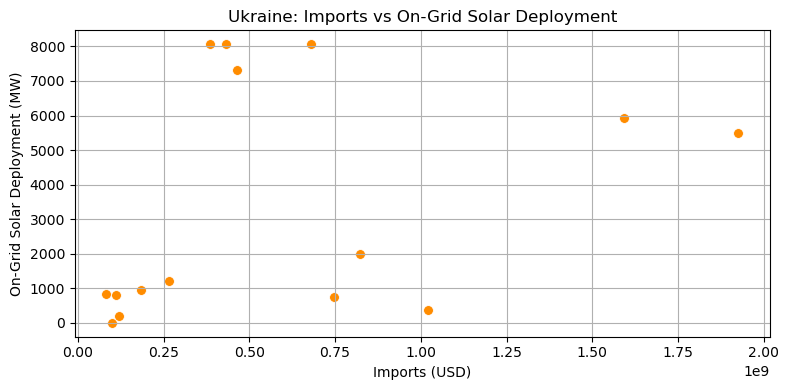

In [40]:
# Scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=ukraine_merged, x="Imports_USD", y="OnGrid_MW", color="darkorange", s=50
)
plt.title("Ukraine: Imports vs On-Grid Solar Deployment")
plt.xlabel("Imports (USD)")
plt.ylabel("On-Grid Solar Deployment (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Min-Max normalization for both columns
ukraine_merged["Imports_Normalized"] = (
    ukraine_merged["Imports_USD"] - ukraine_merged["Imports_USD"].min()
) / (ukraine_merged["Imports_USD"].max() - ukraine_merged["Imports_USD"].min())

ukraine_merged["OnGrid_Normalized"] = (
    ukraine_merged["OnGrid_MW"] - ukraine_merged["OnGrid_MW"].min()
) / (ukraine_merged["OnGrid_MW"].max() - ukraine_merged["OnGrid_MW"].min())

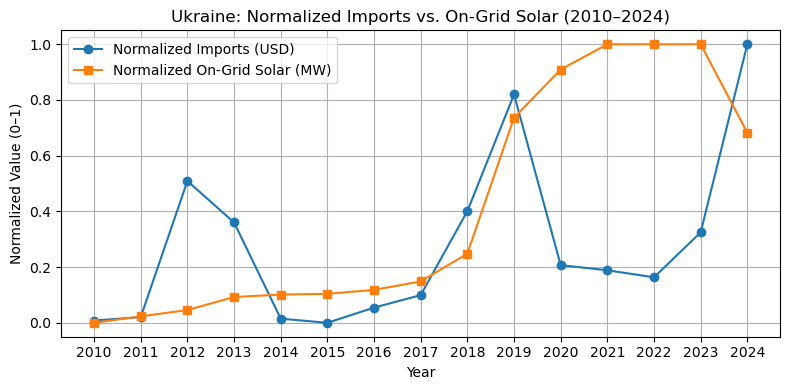

In [42]:
# Line plots

plt.figure(figsize=(8, 4))

# Plot normalized imports
plt.plot(
    ukraine_merged["Year"],
    ukraine_merged["Imports_Normalized"],
    label="Normalized Imports (USD)",
    marker="o",
    linestyle="-",
)

# Plot normalized on-grid solar
plt.plot(
    ukraine_merged["Year"],
    ukraine_merged["OnGrid_Normalized"],
    label="Normalized On-Grid Solar (MW)",
    marker="s",
    linestyle="-",
)

# Customize plot
plt.title("Ukraine: Normalized Imports vs. On-Grid Solar (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0–1)")
plt.legend()
plt.grid(True)
plt.xticks(ukraine_merged["Year"])
plt.tight_layout()
plt.show()

# **Third: On-Grid VS Off-Grid**

##Comparing between non solar on-grid and solar off-grid in Sudan

In [43]:
# Group  solar Off grid data for Sudan between 2010 and 2023
sudan_offgrid = solar_offgrid_agg[
    (solar_offgrid_agg["Country"] == "Sudan (the)")
    & (solar_offgrid_agg["Year"].between(2010, 2023))
]
sudan_offgrid.head()

,Country,Year,OffGrid_MW
1526,Sudan (the),2010,2.26374
1527,Sudan (the),2011,3.48881
1528,Sudan (the),2012,8.06846
1529,Sudan (the),2013,14.66846
1530,Sudan (the),2014,16.58646


In [44]:
# Group  non solar On grid data for Sudan between 2010 and 2023
sudan_ongrid = non_solar_ongrid_agg[
    (non_solar_ongrid_agg["Country"] == "Sudan (the)")
    & (non_solar_ongrid_agg["Year"].between(2010, 2023))
]
sudan_ongrid.head()

,Country,Year,OnGrid_MW
4724,Sudan (the),2010,2661.0
4725,Sudan (the),2011,2661.0
4726,Sudan (the),2012,2765.0
4727,Sudan (the),2013,2765.0
4728,Sudan (the),2014,2765.0


In [45]:
# Merge on 'Year' and Country
sudan_merged = pd.merge(
    sudan_offgrid[["Year", "OffGrid_MW"]],
    sudan_ongrid[["Year", "OnGrid_MW"]],
    on="Year",
    how="inner",
)
sudan_merged.head()

,Year,OffGrid_MW,OnGrid_MW
0,2010,2.26374,2661.0
1,2011,3.48881,2661.0
2,2012,8.06846,2765.0
3,2013,14.66846,2765.0
4,2014,16.58646,2765.0


In [46]:
# Normalize OffGrid_MW
sudan_merged["OffGrid_Normalized"] = (
    sudan_merged["OffGrid_MW"] - sudan_merged["OffGrid_MW"].min()
) / (sudan_merged["OffGrid_MW"].max() - sudan_merged["OffGrid_MW"].min())

# Normalize OnGrid_MW
sudan_merged["OnGrid_Normalized"] = (
    sudan_merged["OnGrid_MW"] - sudan_merged["OnGrid_MW"].min()
) / (sudan_merged["OnGrid_MW"].max() - sudan_merged["OnGrid_MW"].min())

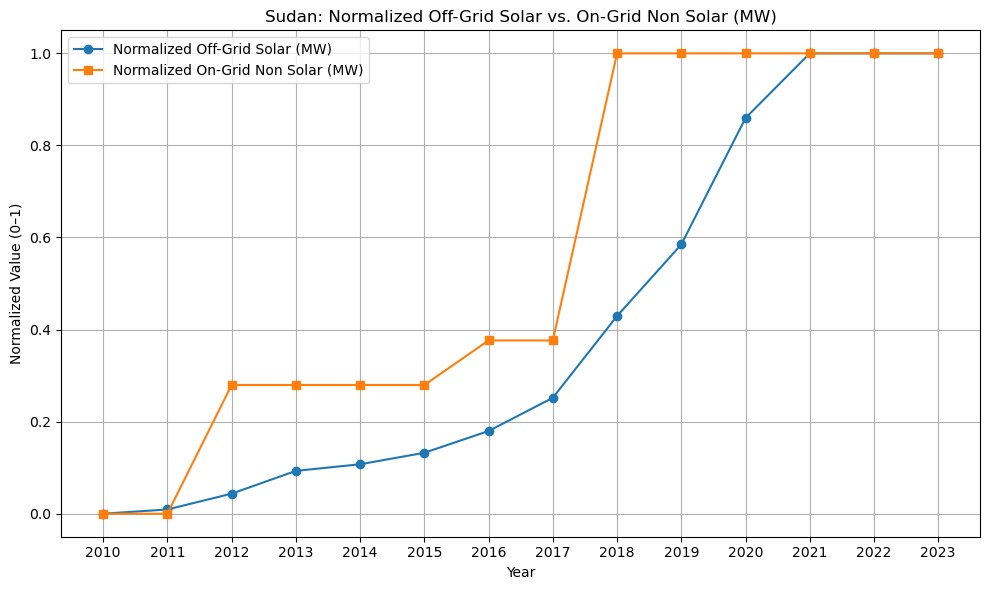

In [47]:
# Line plot
plt.figure(figsize=(10, 6))

# Plot normalized Off-Grid MW
plt.plot(
    sudan_merged["Year"],
    sudan_merged["OffGrid_Normalized"],
    label="Normalized Off-Grid Solar (MW)",
    marker="o",
    linestyle="-",
)

# Plot normalized On-Grid MW
plt.plot(
    sudan_merged["Year"],
    sudan_merged["OnGrid_Normalized"],
    label="Normalized On-Grid Non Solar (MW)",
    marker="s",
    linestyle="-",
)

# Customize the plot
plt.title("Sudan: Normalized Off-Grid Solar vs. On-Grid Non Solar (MW)")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0–1)")
plt.legend()
plt.grid(True)
plt.xticks(sudan_merged["Year"])
plt.tight_layout()
plt.show()